In [65]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [67]:
# Step 2: Load Dataset
df = pd.read_csv("C://Users//schan//Downloads//archive (11)//salary_prediction_data.csv")
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

✅ Dataset loaded successfully!
Shape: (1000, 7)


,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [68]:
# --- Exploratory Data Analysis (EDA) ---
print("Data Info:\n", df.info())
print("\nSummary Stats:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
Data Info:
 None

Summary Stats:
         Experience          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean     14.771000    42.377000  105558.404239
std       8.341111    13.609412   28256.972075
min       1.000000    20.000000   33510.510669
25%       7.000000    30.000000   85032.141517
50%      15.000000    43.000000  104314.518315
75%      22.000000    55.000000  126804.047524
max      29.000000    64.000000  193016.602150


In [69]:
# Step 3: Data Overview
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB

Missing Values:
 Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

Unique values per column:
 Education        4
Experience      29
Location         3
Job_Title        4
Age             45
Gender           2
Salary        1000
dtype: int64


,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [70]:
# Step 4: Data Cleaning
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

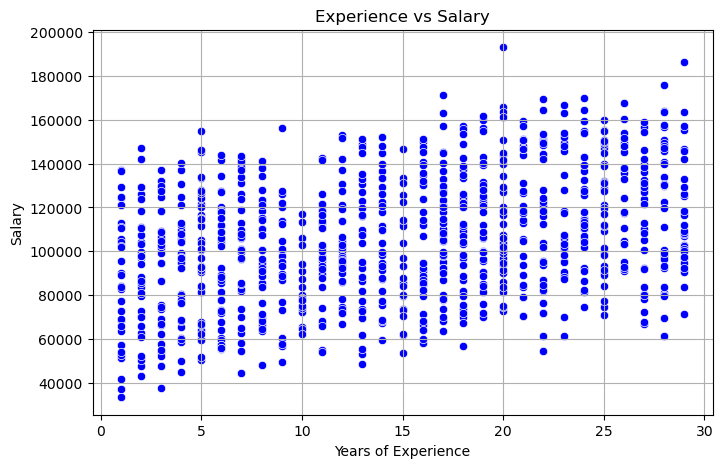

In [71]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Experience', y='Salary', data=df, color='blue')
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

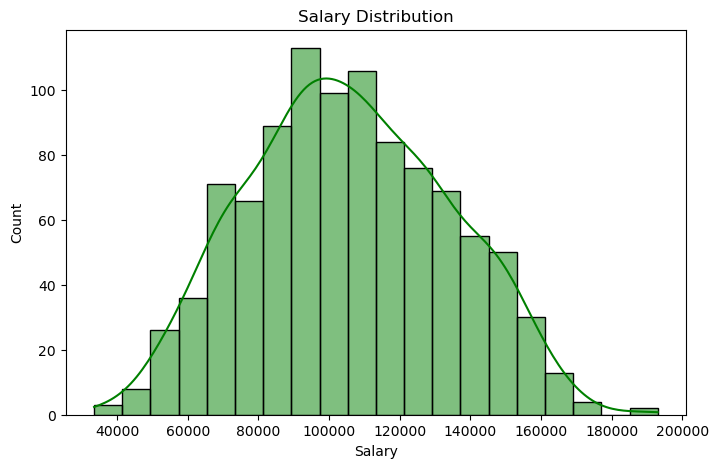

In [72]:
# Step 5: Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, color='green')
plt.title("Salary Distribution")
plt.show()

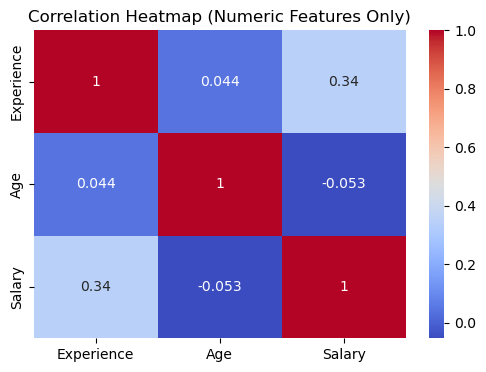

In [75]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


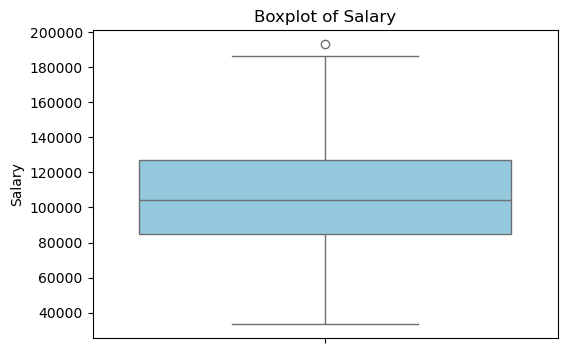

In [40]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Salary'], color='skyblue')
plt.title("Boxplot of Salary")
plt.show()

In [78]:
# Encode Categorical Features
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [77]:
# Step 6: Encode Categorical Data
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.053665
1,3,11,1,1,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,2,0,26,0,132157.786175


In [79]:
# --- Data Splitting ---
X = df[['Experience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Step 7: Feature Scaling & Splitting
X = df.drop('Salary', axis=1)
y = df['Salary']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [81]:
# Step 8: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [82]:
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R² Score:", r2_score(y_test, lr_pred))


Linear Regression Results:
MAE: 15458.827468749834
RMSE: 18813.88840081037
R² Score: 0.5665022841217878


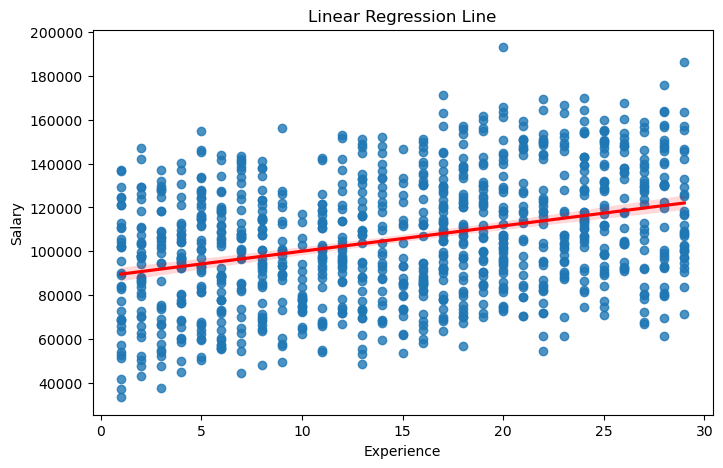

In [47]:
# Plot Linear Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x='Experience', y='Salary', data=df, line_kws={"color": "red"})
plt.title("Linear Regression Line")
plt.show()


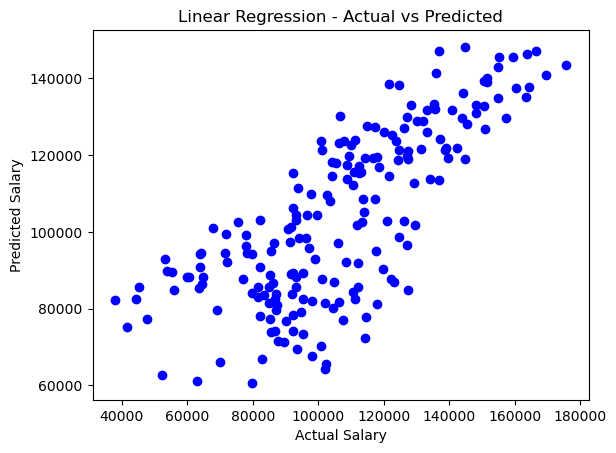

In [48]:
plt.scatter(y_test, lr_pred, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()

In [83]:
# Step 9: Decision Tree
dt_model = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [50]:
print("Decision Tree Results:")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("R² Score:", r2_score(y_test, dt_pred))

Decision Tree Results:
MAE: 12594.80292617396
RMSE: 15549.72290381796
R² Score: 0.7038750537134963


In [52]:
print("\nDecision Tree Regressor:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regressor:
R2 Score: 0.7852737985069738
MSE: 175329645.67821938


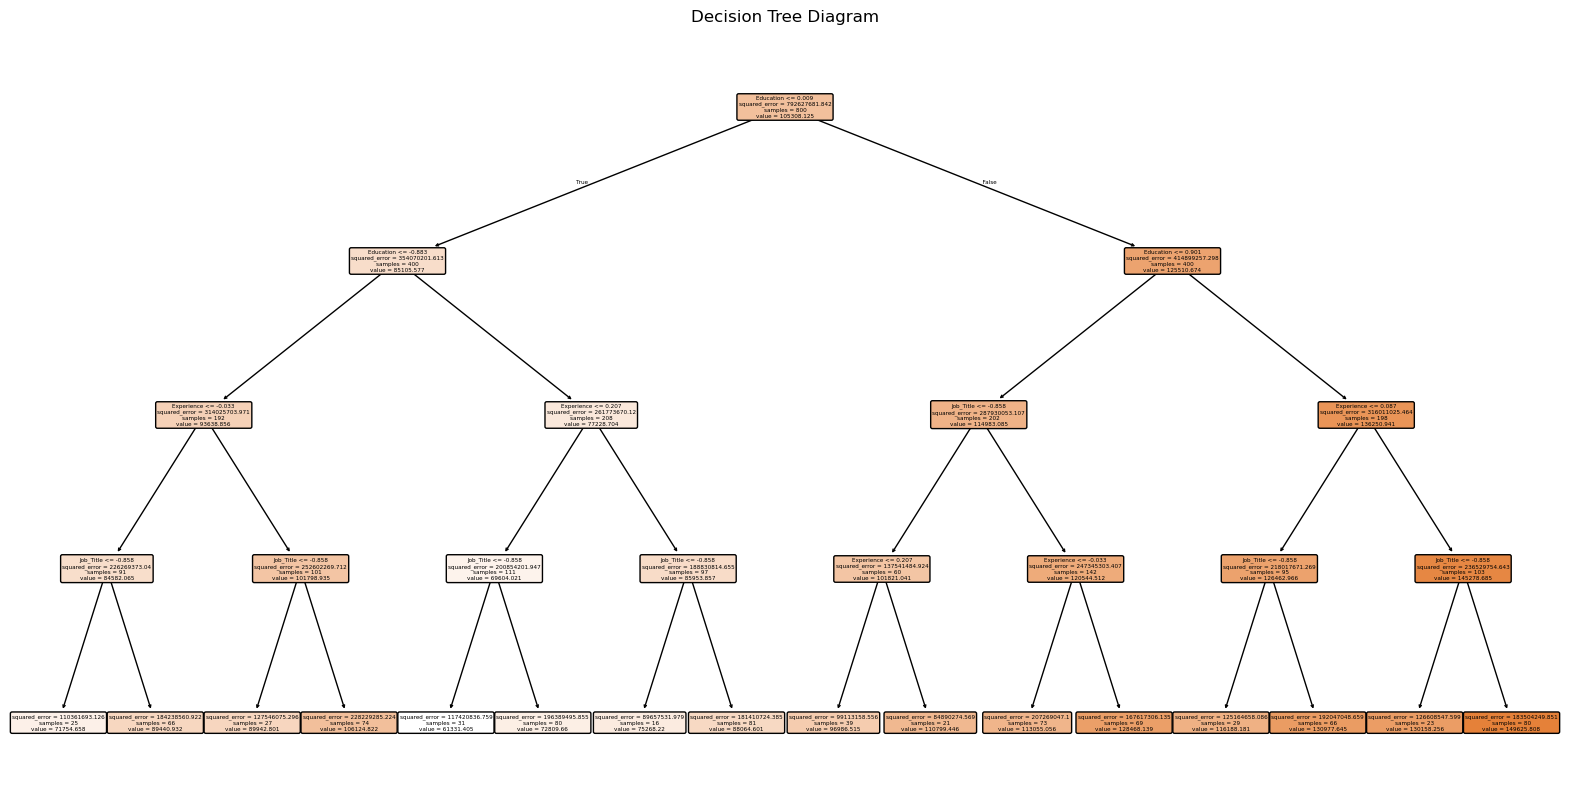

In [84]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Diagram")
plt.show()

In [85]:
# Step 10: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [86]:
print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R² Score:", r2_score(y_test, rf_pred))

Random Forest Results:
MAE: 9325.126056001682
RMSE: 11296.447724635735
R² Score: 0.84371637353657


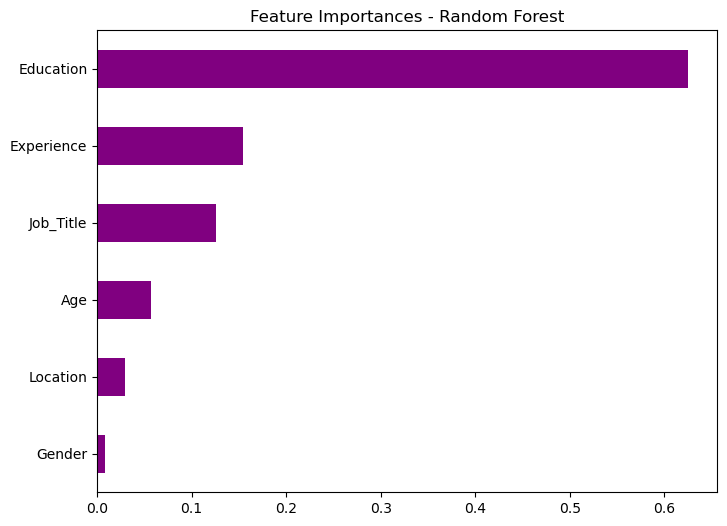

In [87]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6), color='purple')
plt.title("Feature Importances - Random Forest")
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



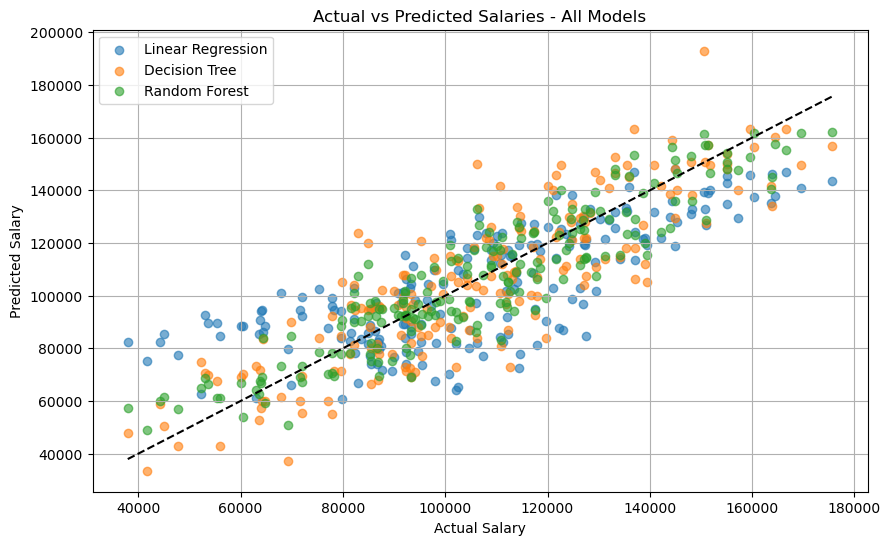

In [94]:
# Model Comparison Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_pred_dt, label="Decision Tree", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries - All Models")
plt.legend()
plt.grid(True)
plt.show()


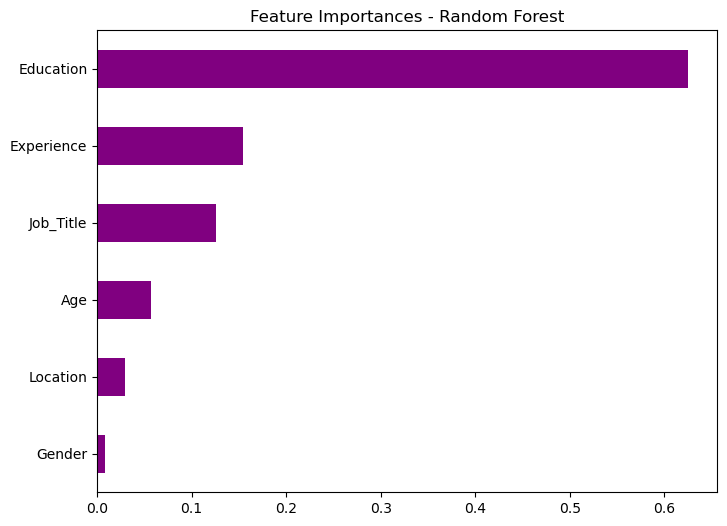

In [95]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=df.drop('Salary', axis=1).columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), color='purple')
plt.title("Feature Importances - Random Forest")
plt.show()

In [96]:
# Step 11 : Save Model
joblib.dump(rf, "salary_prediction_model.pkl")
print("✅ Model saved as salary_prediction_model.pkl")

✅ Model saved as salary_prediction_model.pkl
